In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from array import *
import copy
import random
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from skimage import io
import os
import shutil
tf.__version__

'2.17.0'

In [ ]:
y = np.load('/content/drive/MyDrive/KBTC_labels.npy')
x = np.load('/content/drive/MyDrive/KBTC_images.npy', allow_pickle=True)
print(y.shape)
print(x.shape)

(3264,)
(3264, 150, 150, 3)


In [ ]:
x = x/255.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 101, stratify=y)

In [ ]:
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((2937, 150, 150, 3), (2937,), (327, 150, 150, 3), (327,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoding = OneHotEncoder()
y_train_resized = encoding.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_resized = encoding.fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
np.shape(y_train_resized), np.shape(y_test_resized)

((2937, 4), (327, 4))

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top = False, input_shape = (150, 150, 3), weights='imagenet')

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
global_avarage_polling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
dense_layer = tf.keras.layers.Dense(units = 512, activation = 'relu')(global_avarage_polling)
dense_layer = tf.keras.layers.Dropout(0.5)(dense_layer)
dense_layer = tf.keras.layers.Dense(units = 256, activation = 'relu')(dense_layer)
dense_layer = tf.keras.layers.Dropout(0.5)(dense_layer)
prediction_layer = tf.keras.layers.Dense(units = 4, activation = 'softmax')(dense_layer)

In [ ]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = prediction_layer)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 156, 156, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 38, 38, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 38, 38, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 38, 38, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 19,437,892 (74.15 MB)

 Trainable params: 19,208,836 (73.28 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [ ]:
model_path = 'BTC_1.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint(model_path, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)
earlystop = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1, restore_best_weights = True,
                          min_delta = 0.001)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, mode = 'min',
                              min_delta = 0.0001)

callback = [earlystop, checkpoint, reduce_lr]

In [ ]:
history = model.fit(x_train, y_train_resized, verbose = 1, validation_data = (x_test, y_test_resized),
                                epochs = 50, callbacks=callback, batch_size = 32)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6005 - loss: 1.1666   
Epoch 1: val_loss improved from inf to 33.70957, saving model to BTC_1.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.6015 - loss: 1.1639 - val_accuracy: 0.3456 - val_loss: 33.7096 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.8017 - loss: 0.6083
Epoch 2: val_loss improved from 33.70957 to 5.52265, saving model to BTC_1.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 263ms/step - accuracy: 0.8021 - loss: 0.6071 - val_accuracy: 0.5443 - val_loss: 5.5227 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.8830 - loss: 0.3871
Epoch 3: val_loss improved from 5.52265 to 1.24768, saving model to BTC_1.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.8832 - loss: 0.3865 - val_accuracy: 0.6453 - val_loss: 1.2477 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8865 - loss: 

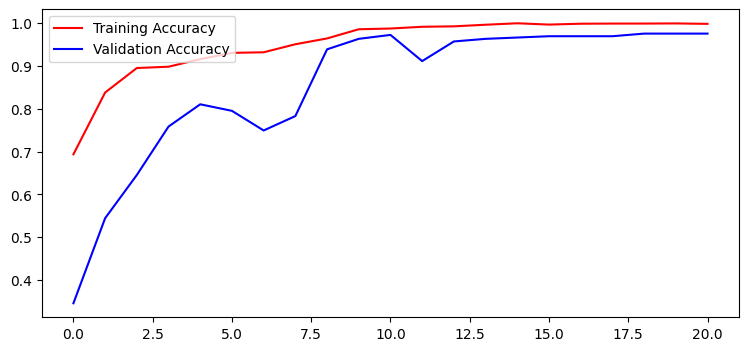

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(9,4))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

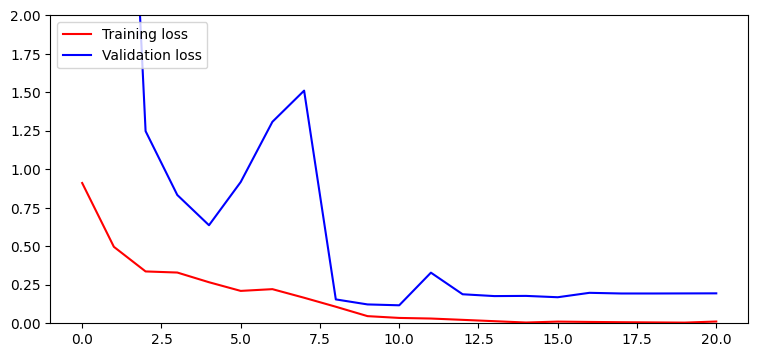

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(9,4))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.ylim(0,2)
plt.legend(loc='upper left')
plt.show()

In [ ]:
accuracy, loss = model.evaluate(x_test, y_test_resized)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9701 - loss: 0.1036


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = -1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step


<Axes: >

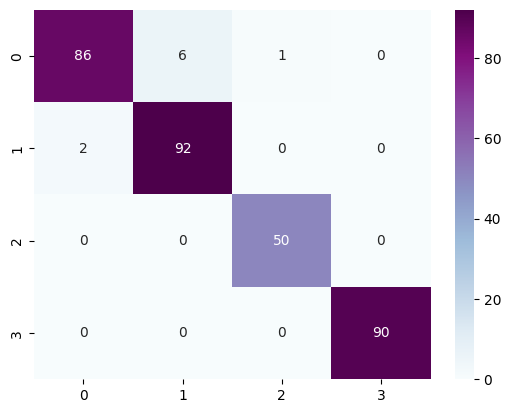

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test_resized, axis = 1), y_pred)
sns.heatmap(cm, annot=True, cmap="BuPu", fmt = 'd')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
report = classification_report(np.argmax(y_test_resized, axis = 1), y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        93
           1       0.94      0.98      0.96        94
           2       0.98      1.00      0.99        50
           3       1.00      1.00      1.00        90

    accuracy                           0.97       327
   macro avg       0.97      0.98      0.97       327
weighted avg       0.97      0.97      0.97       327



In [ ]:
accuracy_score(np.argmax(y_test_resized, axis = 1), y_pred)

0.9724770642201835